### Import Libraries

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

### Create Dataset

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

### Train MLPClassifier

In [3]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.64


### Parameters

In [4]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
mlp = MLPClassifier(
    max_iter=1000,  # iterations to converge on the optimal coefficients
    hidden_layer_sizes=(100, 50),  # wo hidden layers, one of 100 nodes and one of 50 nodes.
    alpha=0.0001,  # step size, how much the neural network changes the coefficients at each iteration
    solver='adam',  # what algorithm is used to find the optimal solution
    random_state=3
)
mlp.fit(X_train, y_train)
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.76


## MNIST Dataset

In this lesson we will be working with a new dataset, the MNIST database of handwritten digits. NIST is the National Institute of Standards and Technology and the M stands for Modified.   

This is a database of images of handwritten digits. We will build a classifier to determine which digit is in the image.   

We will start with the version of the MNIST dataset that is built into scikit-learn. This has the images with only 8 by 8 pixels, so they are blurry.   

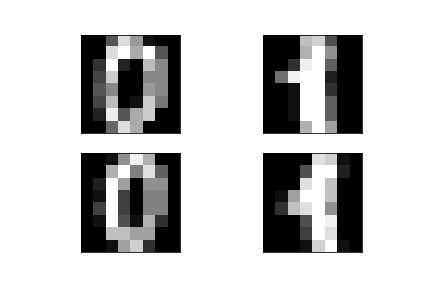   



In [5]:
from sklearn.datasets import load_digits
X, y = load_digits(n_class=2, return_X_y=True)
print(X.shape, y.shape)
print(X[0])
print(y[0])
print(X[0].reshape(8, 8))

(360, 64) (360,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


We see that we have 300 datapoints and each datapoint has 64 features. We have 64 features because the image is 8 x 8 pixels and we have 1 feature per pixel. The value is on a grayscale where 0 is black and 16 is white. 

### Draw the digits

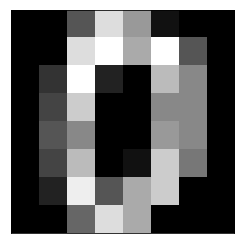

In [7]:
X, y = load_digits(n_class=2, return_X_y=True)
plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())  # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()

### MLP for MNIST Dataset

In [8]:
X, y = load_digits(n_class=2, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [11]:
print(mlp.score(X_test, y_test))

1.0


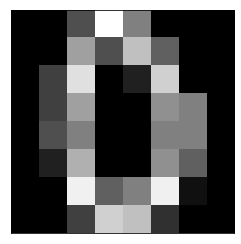

[0]


In [9]:
x = X_test[0]
plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print(mlp.predict([x]))
# 0


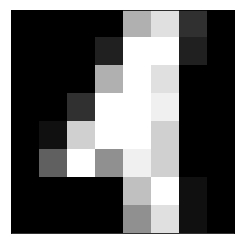

[1]


In [10]:
x = X_test[1]
plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print(mlp.predict([x]))
# 1


#### Classifying all 10 Digits

In [12]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)
print(mlp.score(X_test, y_test))


0.96


Let’s look at the ones we got incorrect

In [13]:
y_pred = mlp.predict(X_test)
incorrect = X_test[y_pred != y_test]
incorrect_true = y_test[y_pred != y_test]
incorrect_pred = y_pred[y_pred != y_test] 

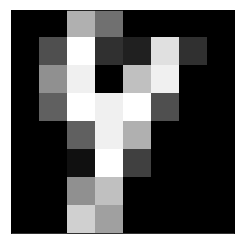

true value: 4
predicted value: 9


In [14]:
j = 0
plt.matshow(incorrect[j].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print("true value:", incorrect_true[j])
print("predicted value:", incorrect_pred[j])

### Visualizing MLP Weights

In [16]:
import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape, y.shape)
print(np.min(X), np.max(X))
print(y[0:5])


(70000, 784) (70000,)
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64 pixel1       0.0
pixel2       0.0
pixel3       0.0
pixel4       0.0
pixel5       0.0
            ... 
pixel780    62.0
pixel781     0.0
pixel782     0.0
pixel783     0.0
pixel784     0.0
Length: 784, dtype: float64
0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [19]:
y=y.astype('int')
X5 = X[y <= 3]
y5 = y[y <= 3]


In [20]:
mlp = MLPClassifier(
    hidden_layer_sizes=(6,),
    max_iter=200,
    alpha=1e-4,
    solver='sgd',
    random_state=2
)

mlp.fit(X5, y5)


MLPClassifier(hidden_layer_sizes=(6,), random_state=2, solver='sgd')

The MLPClassifier stores the coefficients in the coefs_ attribute. Let’s see what it looks like.

In [22]:
print(mlp.coefs_)

[array([[-0.01115574, -0.08262848,  0.0086559 , -0.01127296, -0.01387946,
        -0.02957172],
       [-0.05147814,  0.02078828, -0.0349191 , -0.04064074,  0.02111297,
         0.00507931],
       [-0.06369073,  0.00236659, -0.05500042,  0.04973237,  0.06169597,
        -0.00100449],
       ...,
       [ 0.03318821,  0.03072625,  0.04947784, -0.07696037, -0.02204154,
        -0.00295475],
       [ 0.03754545,  0.02460182,  0.03225105,  0.04285343, -0.07510656,
        -0.05427412],
       [-0.06503767, -0.07023678, -0.02863243, -0.01949494,  0.07608973,
        -0.05707042]]), array([[ 0.1638473 , -2.145555  ,  0.13976636,  0.98950143],
       [-0.0347403 , -0.21458465, -0.311427  ,  0.896483  ],
       [-2.56161429, -0.46390012,  1.55140857,  1.35598872],
       [ 1.32292626, -2.67019032,  0.18579891, -0.01939293],
       [ 0.49681925, -0.70907455, -0.96713416, -0.06063507],
       [ 0.13465957,  0.09444063, -0.78005867, -0.21693179]])]


In [23]:
print(len(mlp.coefs_))

2


The two elements in the list correspond to the two layers: the hidden layer and the output layer. We have an array of coefficients for each of these layers. Let’s look at the shape of the coefficients for the hidden layer.

In [24]:
print(mlp.coefs_[0].shape)

(784, 6)


We see that we have a 2-dimensional array of size 784 x 6. There are 6 nodes and 784 input values feeding into each node, and we have a weight for each of these connections. 

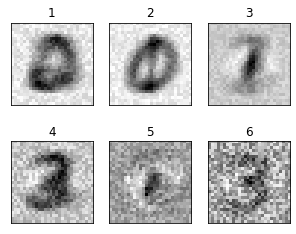

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(5, 4))
for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)

plt.show()

You can see that nodes 4 and 6 are determining if the digit is a 3. Node 1 is determining if the digit is a 0 or a 2 since you can see both of those values in the image. Not every hidden node will have an obvious use. 